# Unit 5 - Financial Planning


In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv("api_key.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
asset_data = {"asset": [1.2,5.3]}
asset = ["BTC", "ETH"]
df_asset = pd.DataFrame(asset_data, index=asset)
df_asset

,asset
BTC,1.2
ETH,5.3


In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
#Looking at BTC_URL
btc_url = btc_url + "?format=json"
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
response_btc_content = response_btc_data.content
print(response_btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18612125,\n\t\t\t"total_supply": 18612125,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 30693.0000000000000000,\n\t\t\t\t\t"volume_24h": 48426528524,\n\t\t\t\t\t"market_cap": 571270810158,\n\t\t\t\t\t"percentage_change_1h": 1.1691987310942600,\n\t\t\t\t\t"percentage_change_24h": -4.5630442758480500,\n\t\t\t\t\t"percentage_change_7d": -14.9879749660759000,\n\t\t\t\t\t"percent_change_1h": 1.1691987310942600,\n\t\t\t\t\t"percent_change_24h": -4.5630442758480500,\n\t\t\t\t\t"percent_change_7d": -14.9879749660759000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1611775782\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1611775782,\n\t\t"num_cryptocurrencies": 1371,\n\t\t"error": null\n\t}\n}'


In [10]:
import json
# Formatting the JSON file
data_btc = response_btc_data.json()
print(json.dumps(data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18612125,
            "total_supply": 18612125,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 30693.0,
                    "volume_24h": 48426528524,
                    "market_cap": 571270810158,
                    "percentage_change_1h": 1.16919873109426,
                    "percentage_change_24h": -4.56304427584805,
                    "percentage_change_7d": -14.9879749660759,
                    "percent_change_1h": 1.16919873109426,
                    "percent_change_24h": -4.56304427584805,
                    "percent_change_7d": -14.9879749660759
                }
            },
            "last_updated": 1611775782
        }
    },
    "metadata": {
        "timestamp": 1611775782,
        "num_crypt

In [11]:
#Looking at ETH_URL
eth_url = eth_url + "?format=json"
requests.get(eth_url)
response_data = requests.get(eth_url)
response_content = response_data.content
print(response_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 114427667,\n\t\t\t"total_supply": 114427667,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1266.9000000000000000,\n\t\t\t\t\t"volume_24h": 37802423912,\n\t\t\t\t\t"market_cap": 145534147250,\n\t\t\t\t\t"percentage_change_1h": 1.2457652619632100,\n\t\t\t\t\t"percentage_change_24h": -5.4757550210923500,\n\t\t\t\t\t"percentage_change_7d": -8.4267942213562500,\n\t\t\t\t\t"percent_change_1h": 1.2457652619632100,\n\t\t\t\t\t"percent_change_24h": -5.4757550210923500,\n\t\t\t\t\t"percent_change_7d": -8.4267942213562500\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1611775771\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1611775771,\n\t\t"num_cryptocurrencies": 1371,\n\t\t"error": null\n\t}\n}'


In [13]:
import json
# Formatting the JSON file
data = response_data.json()
print(json.dumps(data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114427667,
            "total_supply": 114427667,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1266.9,
                    "volume_24h": 37802423912,
                    "market_cap": 145534147250,
                    "percentage_change_1h": 1.24576526196321,
                    "percentage_change_24h": -5.47575502109235,
                    "percentage_change_7d": -8.42679422135625,
                    "percent_change_1h": 1.24576526196321,
                    "percent_change_24h": -5.47575502109235,
                    "percent_change_7d": -8.42679422135625
                }
            },
            "last_updated": 1611775771
        }
    },
    "metadata": {
        "timestamp": 1611775771,
        "num_cry

In [14]:
# Fetch current BTC price
btc_price = data_btc['data']['1']['quotes']['USD']['price']
 
# Fetch current ETH price
eth_price = data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36831.60
The current value of your 5.3 ETH is $6714.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Current amount of shares
my_spy = 50
my_agg = 200
shares_data = {"shares": [50,200]}
shares = ["SPY", "AGG"]
df_shares = pd.DataFrame(shares_data, index=shares)
df_shares

,shares
SPY,50
AGG,200


In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [18]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [19]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
amount = {my_spy_value + my_agg_value, my_btc_value + my_eth_value}
asset_share = ["shares","crypto"]
df_savings = pd.DataFrame(amount, index=asset_share)
df_savings.columns=["amount"] 

# Display savings DataFrame
display(df_savings)

,amount
shares,42728.00
crypto,43546.17


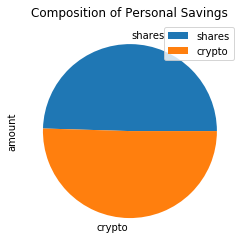

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [57]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
amount_savings = (my_spy_value + my_agg_value) + (my_btc_value + my_eth_value)

# Validate saving health
if emergency_fund < amount_savings:
    print("Congratulations! You have enough money in your emergency fund.")
    if emergency_fund == amount_savings:
        print("Congratulations! You have reached your financial goal.")
        if emergency_fund > amount_savings:
            print("Keep working on your financial goals! You are only ${emergency_fund - amount_savings} away from reaching them.")
   # If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

    # If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

    # If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Display sample data
df_tickers.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation (
    portfolio_data = df_tickers,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017794,1.003452,1.000770,1.000018,1.004784,1.000996,0.990440,1.003598,1.003698,0.984083,...,1.000835,1.001582,0.999291,1.004990,0.998307,0.982981,1.008996,0.995494,0.998488,1.010950
2,1.028964,1.019354,1.016660,1.003979,1.007677,0.997005,0.992752,1.006035,1.006942,0.982554,...,0.999557,1.000349,1.005045,1.001412,0.998227,0.979212,1.021642,0.996717,1.000986,0.997901
3,1.032248,1.020352,1.017268,1.000513,1.007726,1.005736,0.981036,1.006185,0.996914,0.993391,...,0.995539,1.004282,1.023786,1.004803,1.000873,0.974429,1.021359,0.994929,1.006663,0.991961
4,1.038124,1.003758,1.018286,1.005448,1.011139,0.998818,0.984657,1.004916,0.988883,0.998579,...,0.997127,1.006521,1.032691,1.011407,0.995370,0.967426,1.026682,0.993215,1.009211,0.989864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.945140,11.478258,8.504727,13.688035,4.368218,8.612363,22.122216,7.495634,7.948998,7.766891,...,4.204318,29.878266,11.053423,11.967543,3.605931,7.884936,6.412317,3.015173,4.099707,4.349721
7557,14.914330,11.381615,8.426595,13.803172,4.331364,8.568923,22.120796,7.522256,7.892075,7.798848,...,4.241188,29.607671,11.075713,11.899062,3.624203,7.878722,6.375877,2.957612,4.111429,4.314752
7558,14.997291,11.363778,8.531635,13.807206,4.320316,8.525658,22.038697,7.530904,7.820969,7.778817,...,4.338938,29.296810,11.092754,11.963204,3.638792,7.882375,6.350903,2.985897,4.173627,4.277788
7559,15.065402,11.296916,8.469219,13.758383,4.346418,8.527590,22.323348,7.505870,7.804830,7.694646,...,4.383655,29.099132,11.004755,12.000221,3.681356,7.935198,6.293370,3.018054,4.187268,4.248035


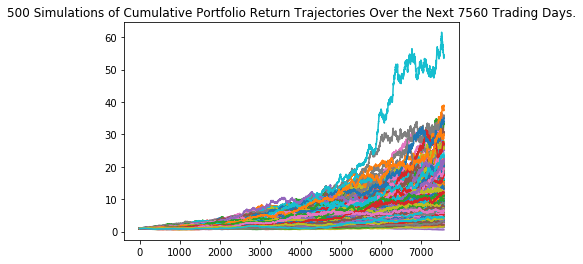

In [37]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

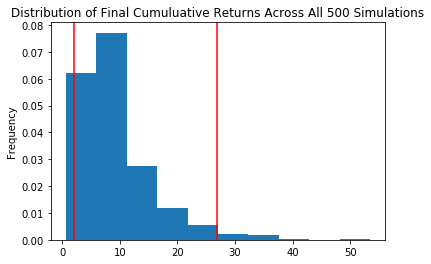

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.356519
std               6.526657
min               0.595261
25%               5.030153
50%               7.788694
75%              11.325261
max              53.471046
95% CI Lower      2.056876
95% CI Upper     26.820492
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_Lower = round(tbl[8]*20000,2)
CI_Upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_Lower} and ${CI_Upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41137.52 and $536409.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
CI_Lower = round(tbl[8]*30000,2)
CI_Upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_Lower} and ${CI_Upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61706.28 and $804614.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation (
    portfolio_data = df_tickers,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_dist_five.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010873,0.998816,0.990952,1.013059,0.996213,0.997435,1.002967,1.000583,0.997549,0.991035,...,0.995240,1.000223,0.994252,1.014176,1.003119,0.999555,0.994230,0.986630,1.009524,1.006550
2,0.998869,0.988829,0.991832,1.011477,0.993299,0.988796,1.016100,1.010289,1.001246,0.975626,...,1.002370,0.996318,1.001887,1.014423,1.000962,0.996791,0.996314,0.988416,1.010723,1.010778
3,0.982972,1.002533,0.984043,1.019808,0.994421,0.997981,1.015977,1.008740,1.012291,0.986441,...,0.990149,0.993038,1.004211,1.011610,0.993044,0.986642,0.997211,1.001566,1.020623,1.015610
4,0.991412,1.006592,0.980667,1.013471,0.997675,0.993140,1.011467,1.006843,1.009459,0.981475,...,0.996900,1.009581,1.006766,1.022586,0.994162,0.987063,0.987805,0.992512,1.016800,1.004121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.307460,2.057430,1.028949,1.832146,1.898580,2.897756,2.471484,1.317356,1.539192,1.338526,...,1.432446,0.851285,1.845669,1.202718,1.551565,1.128644,1.288086,1.311200,1.109516,1.433194
1257,1.309266,2.037798,1.016487,1.828140,1.901765,2.910764,2.463224,1.308453,1.532725,1.346029,...,1.446117,0.854391,1.854204,1.212139,1.545274,1.126501,1.286640,1.314325,1.107952,1.415401
1258,1.316217,2.027217,1.010044,1.844014,1.889602,2.896652,2.494611,1.324009,1.535612,1.352974,...,1.449724,0.849077,1.836635,1.208254,1.538694,1.116058,1.281579,1.320127,1.110128,1.433003
1259,1.309143,2.036364,1.005893,1.836340,1.896036,2.876714,2.463122,1.305751,1.525368,1.338508,...,1.451232,0.844551,1.805116,1.219400,1.569410,1.092189,1.281062,1.327903,1.104711,1.441394


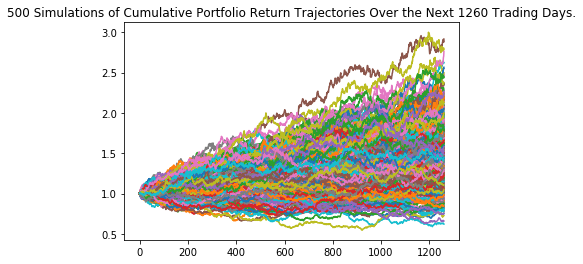

In [44]:
# Plot simulation outcomes
line_plot = MC_dist_five.plot_simulation()

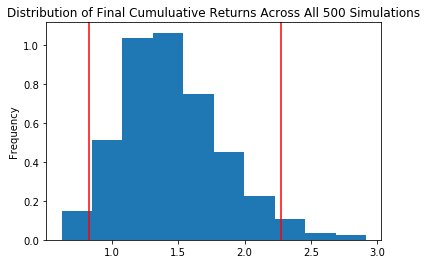

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_five.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.452750
std               0.377796
min               0.621435
25%               1.178452
50%               1.400885
75%               1.674760
max               2.914967
95% CI Lower      0.831724
95% CI Upper      2.274752
Name: 1260, dtype: float64


In [47]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
CI_Lower_five = round(tbl_five[8]*60000,2)
CI_Upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${CI_Lower_five} and ${CI_Upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49903.42 and $136485.14


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation (
    portfolio_data = df_tickers,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_dist_ten.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996121,1.011427,1.004921,1.000105,1.001200,0.996411,1.013354,0.998015,1.009224,0.994232,...,1.006828,1.000947,0.995631,1.006914,0.996081,0.998072,0.995560,0.981215,1.004525,1.002456
2,1.004038,1.002645,0.996194,1.010299,1.005202,1.001238,1.016140,0.990715,1.019784,0.997186,...,1.010112,1.000007,0.988108,1.016815,1.005461,1.001931,0.993701,0.971262,0.999148,1.003688
3,0.998290,1.004664,0.995927,1.018808,1.001966,0.987360,1.023188,0.977499,1.024175,0.999619,...,1.002288,1.011240,0.968116,1.012769,0.999370,1.011358,0.999540,0.973584,0.998275,0.993315
4,0.988581,1.015093,0.988096,1.025260,1.003407,0.996542,1.026807,0.996996,1.006061,1.001252,...,0.995997,1.010570,0.971007,1.005326,0.998934,1.002565,1.003189,0.963890,0.999216,0.991028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.930376,2.123344,2.405368,1.290813,3.094233,2.571808,1.530044,4.097467,2.999525,1.544973,...,2.205924,1.377374,0.983093,2.715594,1.741146,2.286045,1.509213,1.688811,2.942858,2.574283
2517,0.927433,2.144924,2.379541,1.290566,3.102052,2.540813,1.515870,4.174338,3.007017,1.543141,...,2.203498,1.381217,0.991369,2.690204,1.755003,2.289626,1.514742,1.687982,2.963030,2.589022
2518,0.936579,2.162431,2.346369,1.291762,3.105691,2.544677,1.511842,4.218397,3.013521,1.555175,...,2.223240,1.363073,0.996983,2.713258,1.746577,2.291209,1.521959,1.651844,2.963037,2.608347
2519,0.946720,2.155869,2.349647,1.295381,3.140431,2.567878,1.533230,4.264456,3.012233,1.549979,...,2.220327,1.378626,1.003897,2.708514,1.746087,2.296112,1.521639,1.635334,2.974036,2.613301


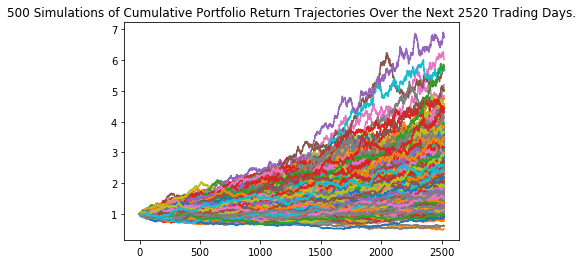

In [50]:
# Plot simulation outcomes
line_plot = MC_dist_ten.plot_simulation()

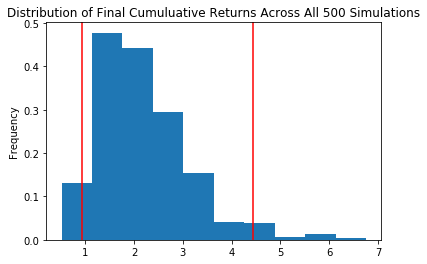

In [51]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_ten.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.190781
std               0.916005
min               0.515855
25%               1.542426
50%               2.025743
75%               2.651833
max               6.755199
95% CI Lower      0.925444
95% CI Upper      4.448872
Name: 2520, dtype: float64


In [53]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
CI_Lower_ten = round(tbl_ten[8]*60000,2)
CI_Upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${CI_Lower_ten} and ${CI_Upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $55526.63 and $266932.35
